# 분류

## 분류(Classification)의 개요

- 지도학습의 대표적인 유형

### 분류는 다양한 머신러닝 알고리즘으로 구현 가능

- 베이즈(Bayes)통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)<br><br>

- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)<br><br>

- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)<br><br>

- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)<br><br>

- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor)알고리즘<br><br>

- 심층 연결 기반의 신경망(Neural Network)<br><br>

- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

## 결정트리

- if/else기반 스무고개 게임 형태<br><br>

- 새로운 규칙 조건마다 규칙 노드 기반의 서브 트리 생성<br><br>

- But! 많은 규칙이 있다는 것은 즉, 분류를 결정하는 방식이 더욱 복잡해진다는 의미이고, 이는 과적합으로 이어지기 쉽다. 즉 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

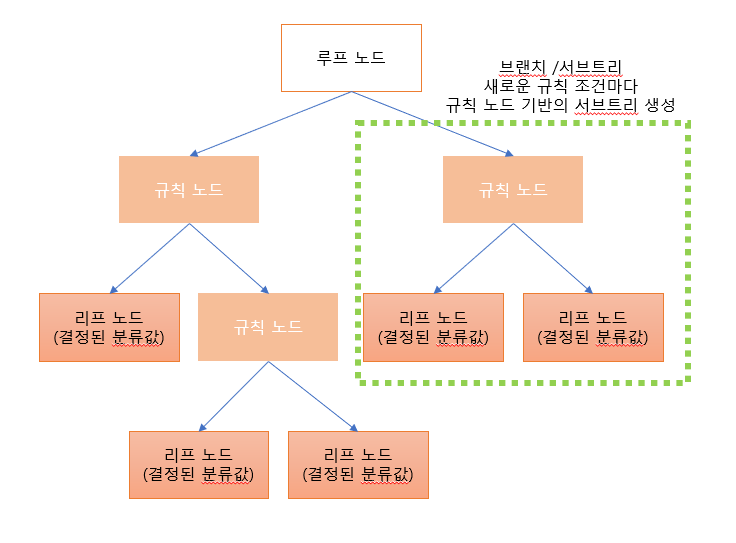

- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다.<br><br>

- 이를 위해서 어떻게 트리를 분할(split)할 것인가가 중요한데, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할 하는 것이 필요하다.

### 균일한 데이터

- 균일한 데이터란 데이터 세트가 A,B,C가 각각 30개의 공을 가지고 있다.<br><br> 

- 그중 A세트는 흰색 15개 검은색 15개, B세트는 흰색 5개 검은색 25개, C세트는 검은색 30개라 가정한다<br><br>

- 이러면 C 세트는 모두 검은공이라 균일도가 가장높고, 그다음 일부 흰색공이 있는 B세트, 마지막으로 A세트 순일거다.<br><br>

- 즉 C세트는 데이터에 대한 별다른 정보없이 검은공이라 예측 가능하고, A세트는 상대적으로 혼잡도높고, 균일도 낮기 때문에 같은 조건에서 데이터를 판단하는 데 더 많은 정보 필요하다.

- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.<br><br>

- 위의 B세트의 경우 if 색깔 == '검은색'이 가장 먼저 만들어지는 규칙일 것이다. (검은색이 가장많고 모양이 똑같기 때문)<br><br>

- 이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보이득(Information Gain)지수와 지니 계수가 있다.

#### 정보이득(Information Gain)

- 정보이득은 엔트로피 개념을 기반으로 한다. 여기서 엔트로피란? 주어진 데이터 집합의 혼잡도를 의미한다.<br><br>

- 서로 다른값이 섞여 있으면 엔트로피(혼잡도)가 높고, 같은 값이 섞여 있으면 엔트로피(혼잡도)가 낮다.<br><br>

- 정보이득은 1 - 엔트로피 지수.<br><br>

- 결정트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성 기준으로 분할.

#### 지니계수

- 지니계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수.<br><br>

- 0이 가장 평등하고, 1로 갈수록 불평등 하다.<br><br>

- 머신러닝 적용시 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

- 여기서 sklearn DecisionTreeClassifier는 기본적으로 지니계수 이용해 데이터 세트 분할!

### 결정트리 모델의 특징<br><br>
결정트리 장점
- 쉽다. 직관적이다.<br><br>
- 피쳐의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.<br><br>

결정트리 단점
- 과적합으로 알고리즘 성능이 떨어짐.<br><br>
- 이를 극복하기 위해선 트리의 크기를 사전에 제한하는 튜닝 필요.

### 결정트리 모델 시각화 API(Graphviz다운 필수)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

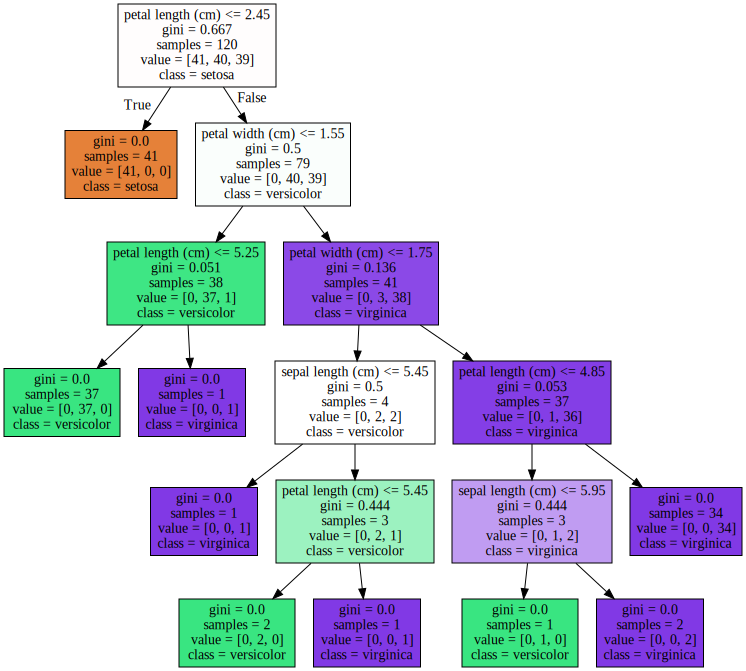

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 위의 트리구성(일부분)

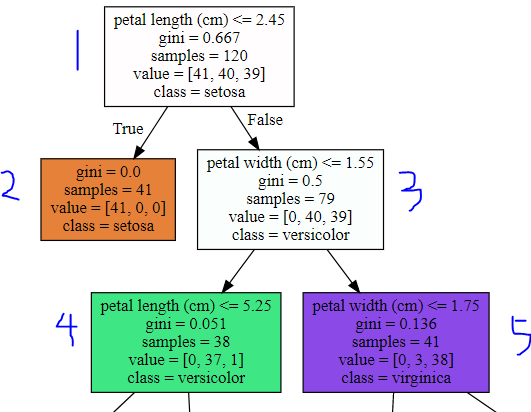

- 1번노드는 전테데이터 120개<br><br>

- value는 구성 Setosa 41개, Versicolor 40개, Virginica 39개<br><br>

- petal length <= 2.45 규칙으로 자식노드 생성

- 자식노드인 2번노드는 petal length <= 2.45 가 True인 규칙으로 setosa에 해당하는 값밖에 없다.

- 자식노드인 3번노드는 petal length <= 2.45가 False인 규칙이며 지니계수는 0.5로 높다.<br><br>

- petal length <= 1.55로 자식노드 생성

- 주황색은 setosa, 초록색은 versicolor, 보라색은 virginica로 각 노드 색깔은 레이블 값을 의미하고, 색깔이 짙어 질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

#### 트리 깊이 조절하지 않을시 생기는 문제점

- 위의 결과처럼 이미 4번 노드에서 샘플데이터가 versicolor 37개, virginica 1개로 균일도가 높지만 max_depth 제한없이 결정트리를 만들어, 분류가 불필요하고 매우 복잡한 규칙트리가 만들어져서 모델이 쉽게 과적합 되는 문제점을 가지게 된다.

### 깊이 3인 결정트리 만들기

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree_3.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

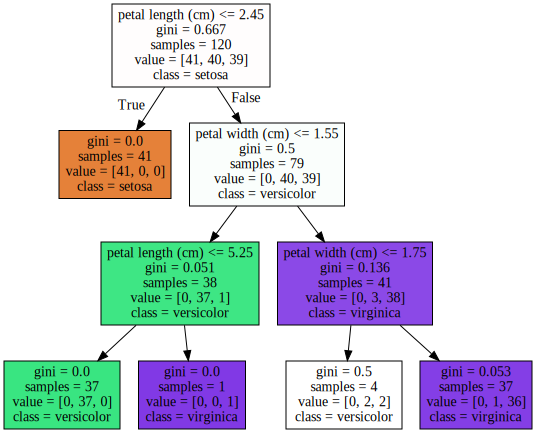

In [6]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree_3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 아까보다는 훨씬 잘나누어 진거 같다.

### min_samples_split, min_samples_leaf 차이 알아보기

#### min_samples_split = 4

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split = 4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [8]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree_min_samples_split_4.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

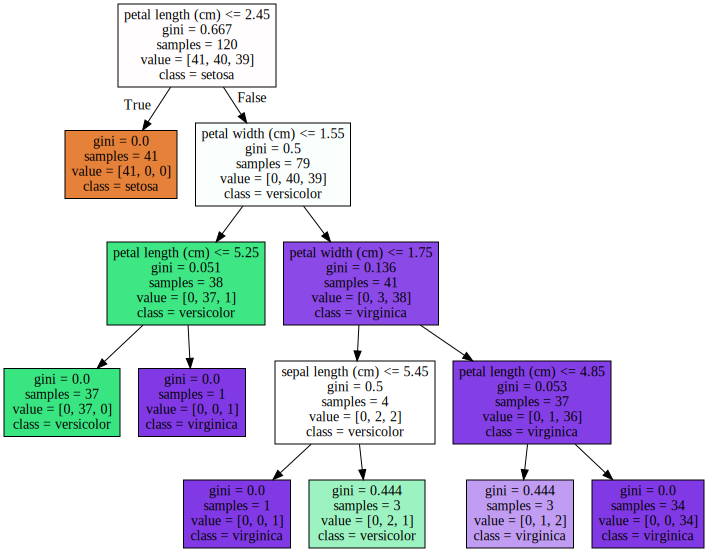

In [9]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree_min_samples_split_4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 위에선 자식노드로 분할시 샘플의 최소개수가 4이상인 것 까지만 자식노드가 생기게 된다.

#### min_samples_leaf = 4

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf = 4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

In [11]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree_min_samples_leaf_4.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

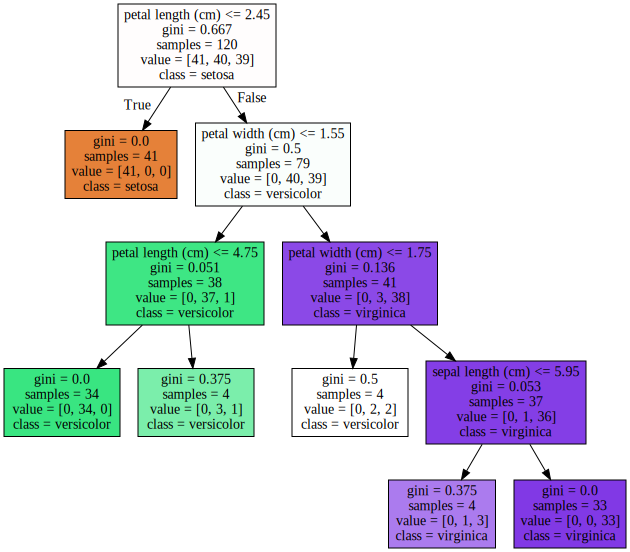

In [12]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree_min_samples_leaf_4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 위에선 샘플이 4가 되는 순간 리프노드가 되어 결정트리가 좀더 간결하게 표현이 된 것처럼 보인다.

- 이처럼 결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 중요한 몇개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있다.

### 피쳐별 중요도 시각화 하기 (feature_importances_)

Feature importances : 
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.0
petal length (cm) : 0.546
petal width (cm) : 0.448


<AxesSubplot:>

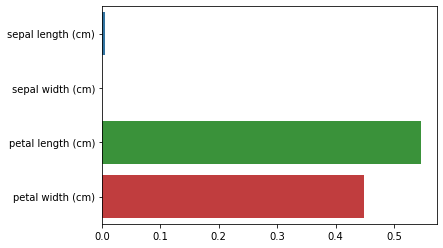

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f"Feature importances : \n{np.round(dt_clf.feature_importances_, 3)}")

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f"{name} : {np.round(value, 3)}")

# feature importance를 column별로 시각화
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

- petal length가 가장 피처 중요도가 높은 것을 알수 있다.

### 결정 트리 과적합(Overfitting)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

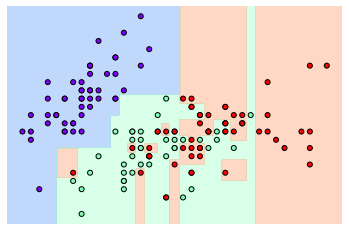

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target

X = iris_df.values[:,:2] # 독립변수를 전부 그래프로 나타내려면 우선 차원을 증가시켜야하는데 일단 변수 2개만 이용해 2차원 그래프로 시각화 시켜보았다.
y = iris_df.values[:,4:]

# 특정한 트리 생성 제약 없는 결정 트리의 학습
dt_clf = DecisionTreeClassifier().fit(X, y)
visualize_boundary(dt_clf, X, y)

- 결정 기준 경계가 많아 한눈에 봐도 이상치가 많이 있어보임

#### min_samples_leaf 로 시각화

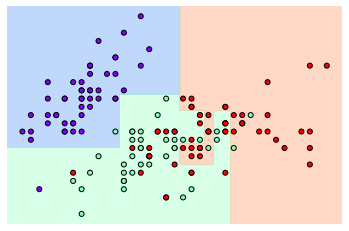

In [16]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습
dt_clf = DecisionTreeClassifier(min_samples_leaf = 4).fit(X, y)
visualize_boundary(dt_clf, X, y)

- 그래도 어느정도 잘 분류된 것 처럼 보인다.

### 결정 트리 실습

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                              header = None, names = ['column_index', 'column_name'])

# 피쳐명 index를 제거하고, 피쳐명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피쳐명에서 10개만 추출 : ",feature_name[:10])

전체 피쳐명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z축 값으로 돼 있음을 유추할 수 있다.

In [18]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 위에서 42개의 피쳐명이 중복되어 있는것 확인가능<br><br>

- 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성<br><br>

- 중복된 feature 삭제해줌

In [1]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

#### human_activity 파일 여는 전용 함수 샐성

In [2]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    # sep = '\s+' 스페이스 한칸이상으로 분류
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
print("## 학습 피쳐 데이터셋 info 확인")
print(X_train.info())

## 학습 피쳐 데이터셋 info 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [22]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


##### 레이블값 분포 확인

In [23]:
print(y_train["action"].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도: {:.4f}".format(accuracy))

# DecisionTreeClassifier 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


- 정확도 : 85.48%

#### 교차 검증 5세트로 설정하고 max_depth를 계속 늘이며 예측성능 측정

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


- 깊이 16일시 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.13%로 도출

#### GridSearchCV 객체 cv_results_속성을 DataFrame으로 설정 ( 하이퍼 파라미터를 순파적으로 입력했을때의 성능수치 가지고 있음 )

In [26]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.894252,0.017489,0.007370,0.000498,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,2.464022,0.088249,0.008182,0.001598,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,3.061617,0.324124,0.010379,0.005408,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,3.165443,0.149465,0.008162,0.000964,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,3.532710,0.259662,0.008360,0.001012,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1


In [27]:
# max_depth값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [28]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


- 깊이가 8일때 정확도가 87.07% 로 가장 높아 보였다. 그 이후 정확도가 감소하는 것 처럼 보인다.

#### max_depth와 min_samples_split같이 변경하며 정확도 성능 튜닝해봄.

In [29]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


#### 위에서 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}로 학습이 완료된 Estimator (best_estimator_로)불러옴

In [30]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


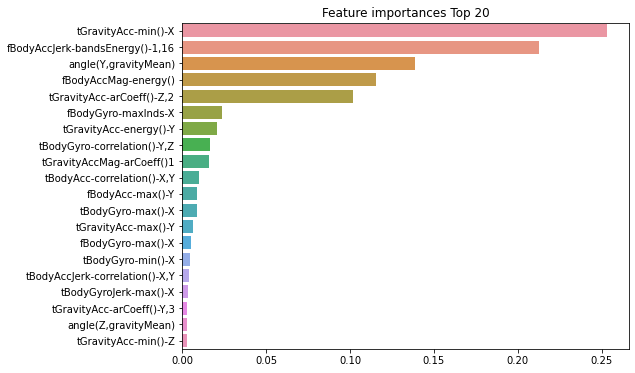

In [31]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 앙상블 학습

- 여러개의 분류기(Classifier)를 생성하고, 그 예측을 결합함으로써 보다 정확한 최종 예측 도출하는 기법<br><br>

- 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

### Voting vs Boosting vs Bagging

- 앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking)으로 나뉨<br><br>

- 보팅과 배깅은 여러기의 분류기가 투표를 통해 최종 예측 결과 결정<br><br>

- 랜덤 포레스트는 대표적인 배깅 방식

### 보팅 분류기 도식화

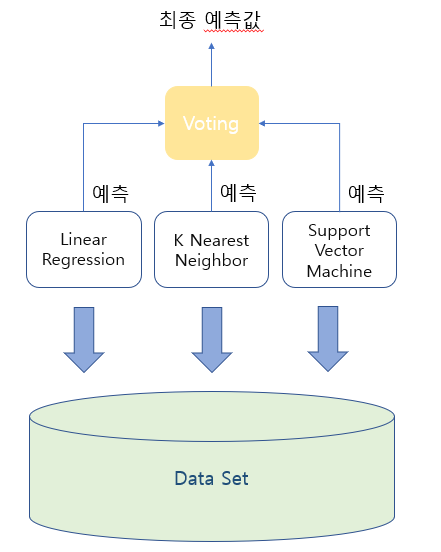

- 위는 선형회귀, K-최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정

### 배깅 분류기 도식화

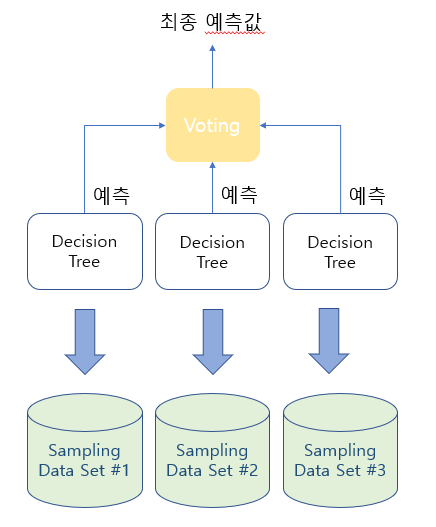

- 단일 알고리즘(결정 트리)로 여러 분류기가 학습으로 개별 예측함<br><br>

- 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하고, 이러한 방식을 ‘부트스트래핑(Bootstrapping) ‘분할 방식이라 부름<br><br>

- 개별분류기가 부트스트래핑 방식으로 샘플링된 데이터에 학습을 통해 개별적 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식이 ‘배깅 앙상블’ 방식<br><br>

- 교차검증은 데이터 세트간 중첩 허용X, But 배깅방식 중첩 허용O<br><br>

- Ex) 10000개의 데이터 10개의 분류기로 배깅방식 쓸시 각 1000개 데이터에 중복된 데이터 존재

### 부스팅

- 부스팅은 여러 개의 분류기가 순차적 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 분류기에 가중치(weight)부여하면서 학습과 예측 진행<br><br>

- 계속해서 분류기에게 가중치를 부스팅 하면서 학습 진행해 부스팅 방식이라 불림<br><br>

- 예측성능 뛰어남!!!!!<br><br>

- 그래디언트 부스트, XGBoost, LightGBM등 존재

### 보팅(Voting) 유형 – 하드보팅 , 소프트 보팅

#### 하드보팅(Hard Voting)

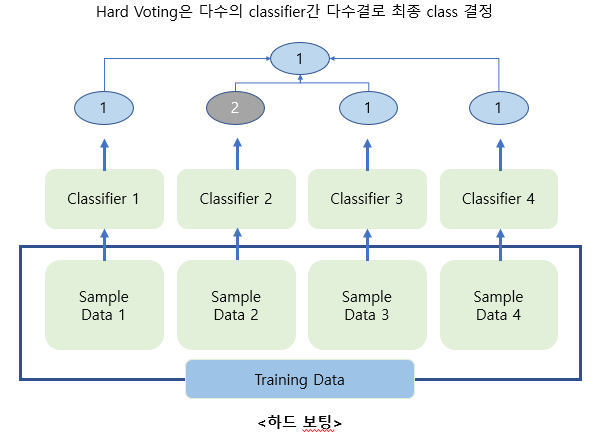

- 하드보팅은 다수결 원칙과 비슷<br><br>

- 위의 하드보팅은 4개의 분류기로 구성된 분류기중 1,3,4분류기가 1로 레이블 값 예측하고, 2번 분류기가 2로 예측해 다수결에 따라 최종예측은 1로 됨

#### 소프트 보팅(Soft Voting)

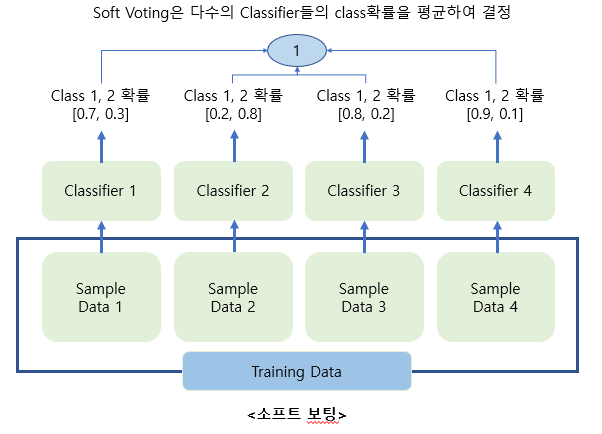

- 소프트 보팅은 분류기들의 레이블 값 결정확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정<br><br>

- 레이블 1 평균 예측하면 (0.7+0.2+0.8+0.9)/4 = 0.65, 레이블 2 평균 예측시 (0.3+0.8+0.2+0.1)/4 = 0.35<br><br>

- 따라서 레이블 1의 확률이 더 크므로 레이블 1값으로 최종보팅<br><br>

- 소프트 보팅이 예측성능이 더 좋아 많이 사용

### 보팅 분류기(Voting Classifier)

In [32]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 개별모델 설정
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# 개별 모델로 설정한 것들 소프트 보팅 기반 앙상블 모델로 구현
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

###
# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{} 정확도: {:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9035


- 위의 결과로는 보팅 분류기가 정확도가 조금 높게 나왔지만, 보팅으로 여러 개의 기반 분류기를 결합한다고 해도 무조건 기존 기반 분류기 보다 예측 성능이 향상되지는 않는다.<br><br>

- 앙상블 학습에서는 결정 트리 알고리즘의 장점은 그대로 취하고 단점을 보완하며, 편향 - 분산 트레이드 오프의 효과를 극대화 할 수 있다.

## 랜덤포레스트

- 배깅은 앞에서 소개한 보팅과는 다르게, 같은 알고리즘으로 여러개의 분류기 만들어서 보팅으로 최종 결정하는 알고리즘이다.<br><br>

- 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

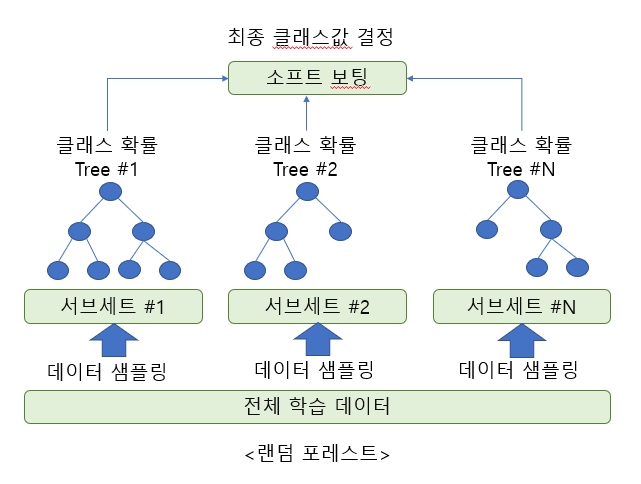

- 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트다.<br><br>

- 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트레핑(bootstrapping) 분할 방식이라 한다.

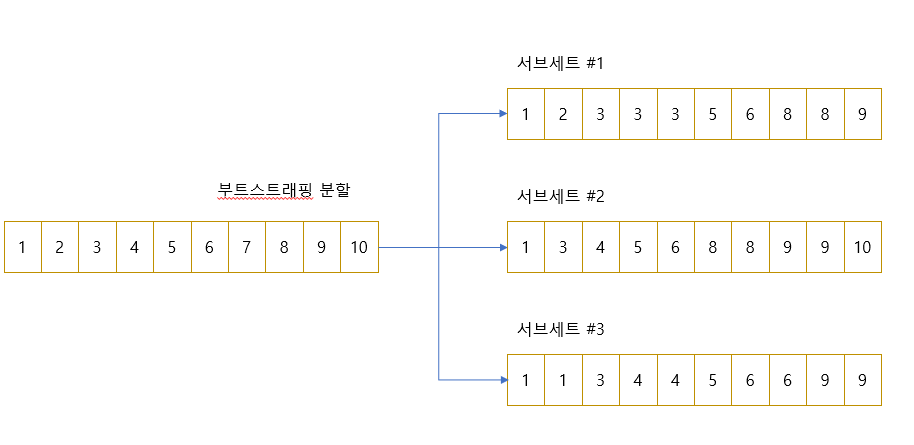

- 위는 원본데이터의 건수가 10개인 학습데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimatores = 3으로 하이퍼 파라미터 부여한것<br><br>

- 이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤포레스트.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도: {:.4f}".format(accuracy))

랜덤 포레스트 정확도: 0.9253


- 랜덤포레스트는 사용자 행동 인식 데이터 세트에 대해 약 92.53%의 정확도를 보여줌.

#### GridSearchCV 이용해 랜덤 포레스트 하이퍼 파라미터 튜닝 (n_estimators = 100)

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1) # 여기서 n_jobs = -1은 모든 CPU코어이용해 학습
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


- {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100} 일때 정확도 91.8%다.

##### n_estimators = 300

In [36]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


- 별도의 테스트 데이터에서 수행한 결과는 91.65%

#### 막대그래프로 시각화

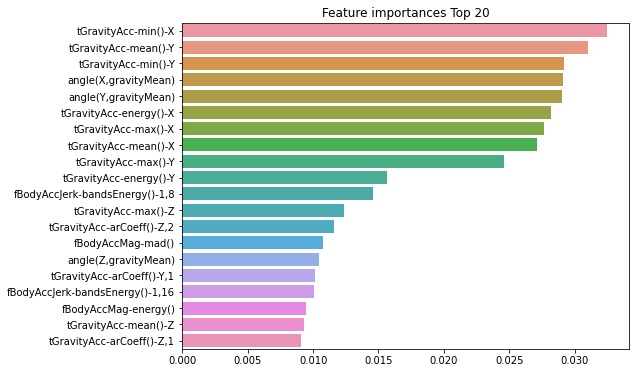

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측 하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식<br><br>

- 부스팅의 대표적인 구성은 AdaBoost(Adaptive boosting)과 그래디언트 부스팅이 있음.

### AdaBoost

- 개별로 약한 학습기는 각각 가중치를 부여해 결합한다.

### GBM

- 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {:.4f}".format(gb_accuracy))
print("GBM 수행 시간: {:.1f}".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 689.5


- 테스트 데이터 세트에서 약 93.9% 정확도 이다. GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘 이지만 수행시간이 오래걸린다.

## XGBoost (eXtra Gradient Boost)

- 분류와 회귀 영역에서 뀌어난 예측성능 발휘<br><br>

- GBM대비 빠른 수행시간<br><br>

- 과적합 규제 기능 내제<br><br>

- 자체 내장된 교차 검증<br><br>

- 결손값 자체 처리

### python xgboost

In [4]:
import xgboost

print(xgboost.__version__)

1.4.2


In [5]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df["target"] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df["target"].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size = 0.2, random_state = 156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [8]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [10]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [11]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params =params, dtrain = dtrain, num_boost_round = num_rounds,
                      early_stopping_rounds = 100, evals = wlist)


[17:06:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stoppings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss

[162]	train-logloss:0.00724	eval-logloss:0.08776
[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:

In [12]:
pred_probs = xgb_model.predict(dtest)
print("predict 수행결괏값을 10개만 표시. 예측 확률 값으로 표시")
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시:",preds[:10])

predict 수행결괏값을 10개만 표시. 예측 확률 값으로 표시
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score, roc_auc_score
import numpy as np

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # f1 score 추가
    f1score = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    print('정확도(Accuracy): {0:.4f}, 정밀도(precision): {1:.4f}, 재현율(recall): {2:.4f}, F1(F1_score):{3:.4f}, ROC-AUC: {4:.4f}'.format(
        accuracy, precision, recall, f1score, roc_auc))
    

In [16]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도(Accuracy): 0.9737, 정밀도(precision): 0.9744, 재현율(recall): 0.9870, F1(F1_score):0.9806, ROC-AUC: 0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

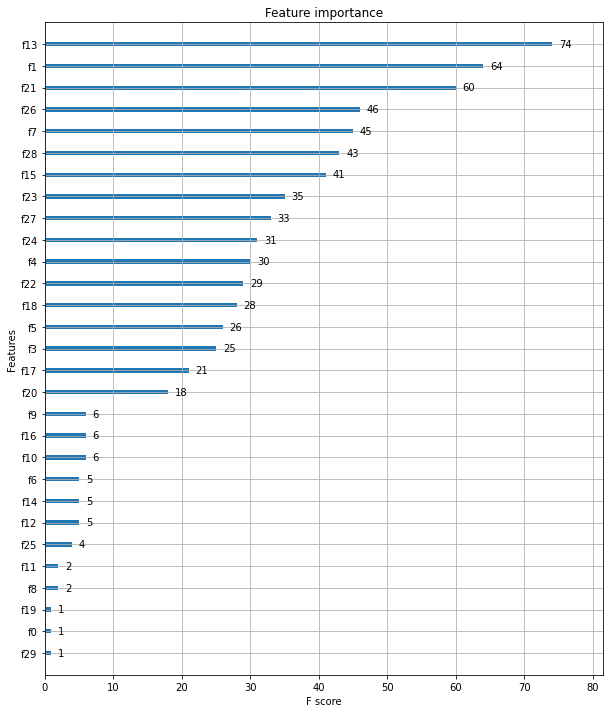

In [17]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

### sklearn xgboost

In [18]:
from xgboost import XGBClassifier # sklearn

xgb_wrapper = XGBClassifier(n_esitimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[17:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_esitimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도(Accuracy): 0.9561, 정밀도(precision): 0.9615, 재현율(recall): 0.9740, F1(F1_score):0.9677, ROC-AUC: 0.9947


#### early_stopping_rounds = 100

In [20]:
from xgboost import XGBClassifier # sklearn

xgb_wrapper = XGBClassifier(n_esitimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss',
                eval_set = evals, verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[17:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_esitimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	

In [21]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도(Accuracy): 0.9561, 정밀도(precision): 0.9615, 재현율(recall): 0.9740, F1(F1_score):0.9677, ROC-AUC: 0.9947


#### early_stopping_rounds = 10

In [22]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = 'logloss',
                eval_set = evals, verbose = True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[17:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_esitimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

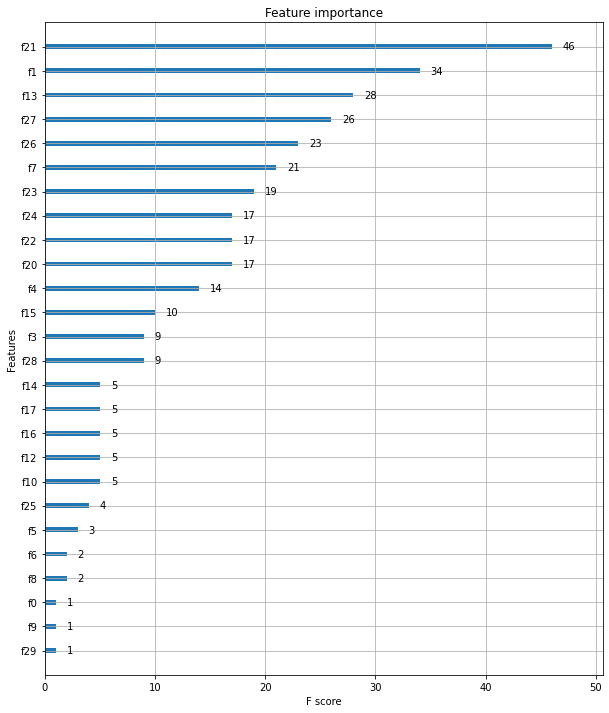

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_wrapper, ax = ax)